DAILY CHALLENGE DATA ANALYST

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [51]:
try:
    df = pd.read_csv('global_power_plant_database.csv', low_memory=False)
except Exception as e:
    print("Error reading the dataset global_power_plant_database.csv:", e)
    exit()


In [40]:
# Initial exploration
print("Preview of the first 5 rows:\n", df.head())

Preview of the first 5 rows:
   country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_

In [68]:
summary = df.describe()
print(summary)

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.213173   
std      489.636072     22.638603     78.405850           17.215166   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.667134           127.988808           154.588104   
std                 1.117514           957.739058          1046.708882   
min              2000.000000          -947.600000          -989.

In [66]:
print(df.columns.tolist())

['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']


In [52]:
# Show column data types to check for issues
print("\nColumn data types:\n", df.dtypes)


Column data types:
 country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gw

In [ ]:
# Optional: Display unique values in each column (for debugging mixed types)
for col in df.columns:
    print(f"\nUnique values in column '{col}':\n", df[col].unique()[:10])


Unique values in column 'country':
 ['AFG' 'ALB' 'DZA' 'AGO' 'ATA' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE']

Unique values in column 'country_long':
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antarctica' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan']

Unique values in column 'name':
 ['Kajaki Hydroelectric Power Plant Afghanistan' 'Kandahar DOG'
 'Kandahar JOL' 'Mahipar Hydroelectric Power Plant Afghanistan'
 'Naghlu Dam Hydroelectric Power Plant Afghanistan'
 'Nangarhar (Darunta) Hydroelectric Power Plant Afghanistan'
 'Northwest Kabul Power Plant Afghanistan'
 'Pul-e-Khumri Hydroelectric Power Plant Afghanistan'
 'Sarobi Dam Hydroelectric Power Plant Afghanistan' 'Bistrica 1']

Unique values in column 'gppd_idnr':
 ['GEODB0040538' 'WKS0070144' 'WKS0071196' 'GEODB0040541' 'GEODB0040534'
 'GEODB0040536' 'GEODB0040540' 'GEODB0040537' 'GEODB0040535' 'WRI1002169']

Unique values in column 'capacity_mw':
 [ 33.    10.    66.   100.    11.55  42.     6.    22.    27.   500.  ]

Unique

In [55]:
# Handle missing values
# Numeric columns: fill missing with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [56]:
# Object (string) columns: fill missing with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [57]:
# Exploratory Data Analysis (EDA)
print("\nStatistical summary (numeric columns):\n", df.describe())
print("\nStatistical summary (all columns):\n", df.describe(include='all'))


Statistical summary (numeric columns):
         capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.213173   
std      489.636072     22.638603     78.405850           17.215166   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.667134           127.988808           154.588104   
std                 1.117514           957.739058          1046.708882   
min              2000.0


Correlation matrix:
                                capacity_mw  latitude  longitude  \
capacity_mw                       1.000000 -0.013218   0.151525   
latitude                         -0.013218  1.000000  -0.068354   
longitude                         0.151525 -0.068354   1.000000   
commissioning_year               -0.041883 -0.076600   0.114576   
year_of_capacity_data             0.038738  0.350082   0.209875   
generation_gwh_2013               0.309295 -0.000833  -0.100122   
generation_gwh_2014               0.342741 -0.009548  -0.057471   
generation_gwh_2015               0.404997  0.010819  -0.043323   
generation_gwh_2016               0.410369  0.013365  -0.038680   
generation_gwh_2017               0.407006  0.013535  -0.040359   
generation_gwh_2018               0.344127 -0.010391  -0.058806   
generation_gwh_2019               0.302463  0.023571  -0.135167   
estimated_generation_gwh_2013     0.401566 -0.022123   0.030390   
estimated_generation_gwh_2014     0.4138

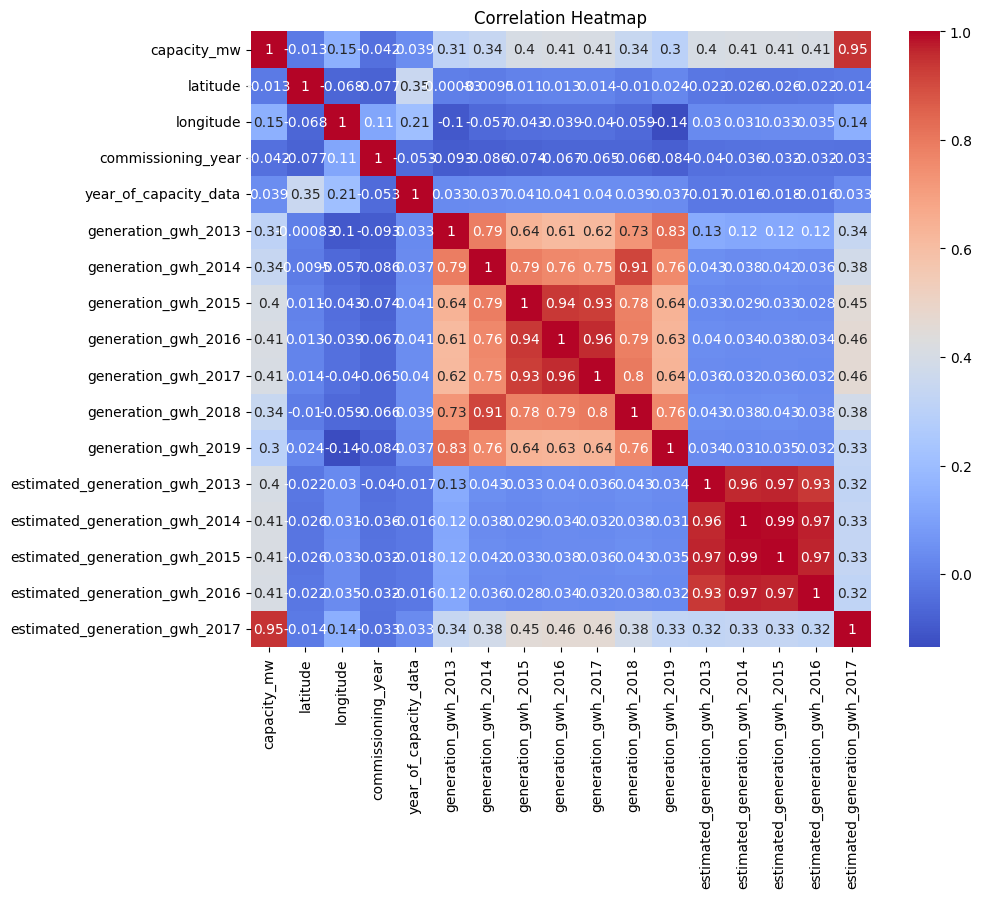

In [62]:
# Correlation matrix and heatmap
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("\nCorrelation matrix:\n", corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

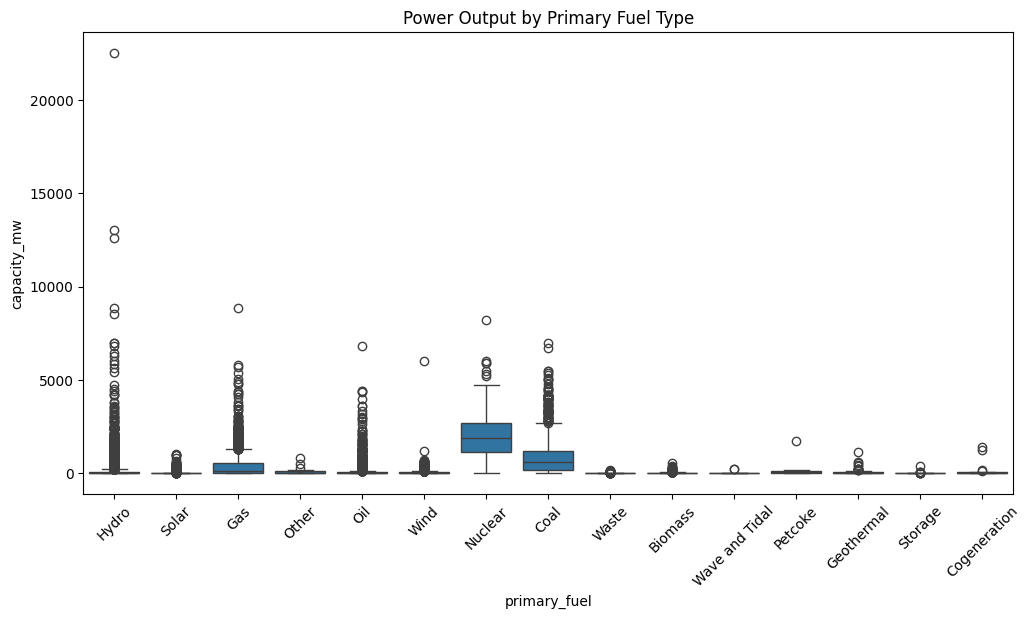

In [67]:
# Boxplot: Capacity by primary fuel type
if 'primary_fuel' in df.columns and 'capacity_mw' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='primary_fuel', y='capacity_mw', data=df)
    plt.title('Power Output by Primary Fuel Type')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'primary_fuel' and/or 'capacity_mw' not found for boxplot.")

In [61]:
# Additional statistics for 'capacity_mw'
if 'capacity_mw' in df.columns:
    capacity = df['capacity_mw'].dropna().to_numpy()
    print("\nStatistics for capacity_mw:")
    print("Mean:", np.mean(capacity))
    print("Median:", np.median(capacity))
    print("Standard deviation:", np.std(capacity))


Statistics for capacity_mw:
Mean: 163.35514790637163
Median: 16.744999999999997
Standard deviation: 489.62906403619894
